In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('online_retail_dataset.xlsx', sheet_name='Online Retail')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.shape

(541909, 8)

In [7]:
print('Number of missing values in the dataset:', df.isnull().sum().sum())
print('Percentage of missing values in the dataset:', df.isnull().sum().sum()*100/(df.shape[0]*df.shape[1]))

Number of missing values in the dataset: 136534
Percentage of missing values in the dataset: 3.149375633178264


In [8]:
print("Number of missing values in 'Description' column:", df['Description'].isnull().sum())
print("Percentage of missing values in 'Description' column:", df['Description'].isnull().sum()*100/df.shape[0])

Number of missing values in 'Description' column: 1454
Percentage of missing values in 'Description' column: 0.2683107311375157


In [9]:
print("Number of missing values in 'CustomerID' column:", df['CustomerID'].isnull().sum())
print("Percentage of missing values in 'CustomerID' column:", df['CustomerID'].isnull().sum()*100/df.shape[0])

Number of missing values in 'CustomerID' column: 135080
Percentage of missing values in 'CustomerID' column: 24.926694334288598


In [10]:
# Check the number of duplicated values
df.duplicated().sum().sum()

5268

In [11]:
# Let's get the duplicated rows
duplicates = df[df.duplicated()]

In [12]:
duplicates[:20]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2010-12-01 11:49:00,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2010-12-01 11:49:00,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,2010-12-01 11:49:00,3.75,17920.0,United Kingdom


In [13]:
df['CustomerID'].nunique()

4372

In [14]:
df['InvoiceNo'].nunique()

25900

In [15]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [16]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

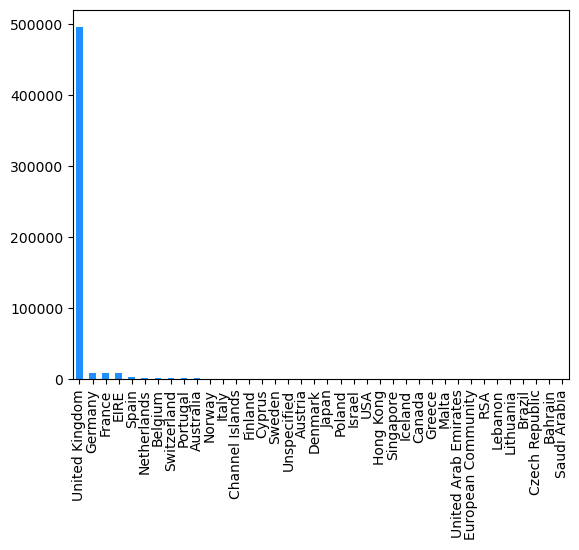

In [17]:
df['Country'].value_counts().plot.bar(color='dodgerblue');

In [18]:
df['Country'].nunique()

38

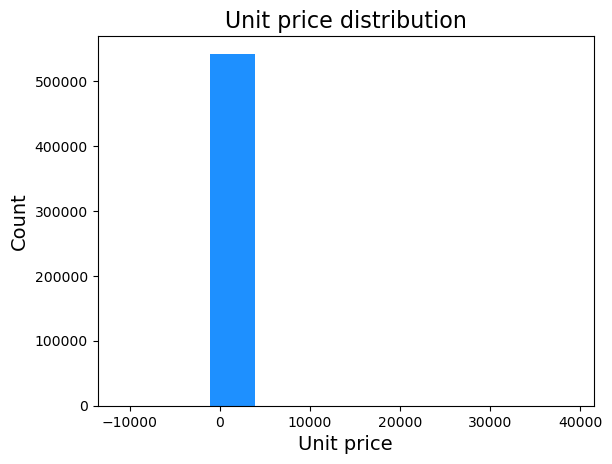

In [19]:
# Let's look at the price distribution of the products

plt.hist(data=df, x='UnitPrice', color='dodgerblue')
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Unit price distribution", fontsize=16);

In [20]:
df['UnitPrice'].describe(percentiles=[.99])

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
50%           2.080000
99%          18.000000
max       38970.000000
Name: UnitPrice, dtype: float64

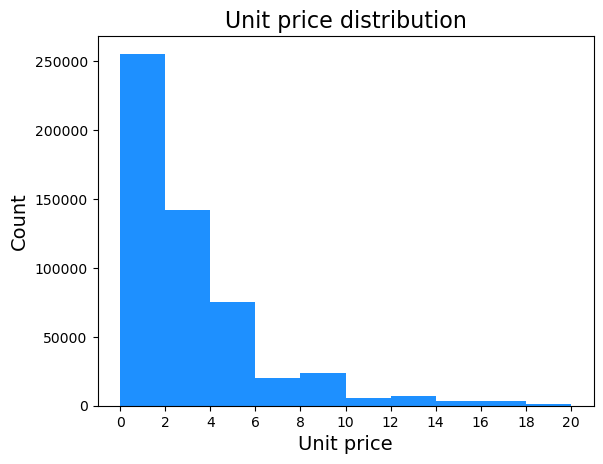

In [21]:
bins = np.arange(0, 21, 2)
ticks = np.arange(0, 21, 2)
plt.hist(data=df, x='UnitPrice', bins=bins, color='dodgerblue')
plt.xticks(ticks, ticks)
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Unit price distribution', fontsize=16);

In [22]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


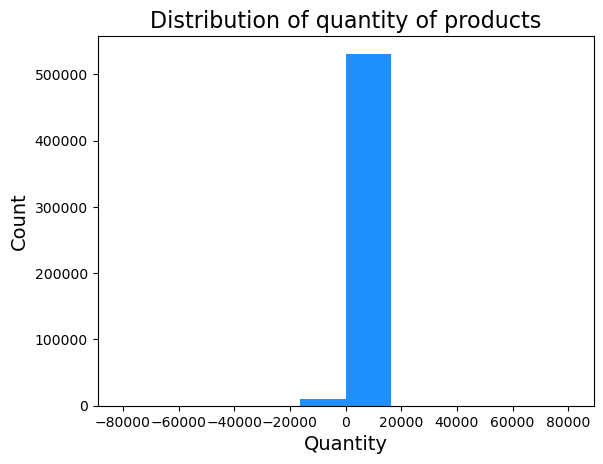

In [23]:
# Let's look at the quantity of the products

plt.hist(data=df, x='Quantity', color='dodgerblue')
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of quantity of products", fontsize=16);

In [24]:
df['Quantity'].describe(percentiles=[.99])

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
50%           3.000000
99%         100.000000
max       80995.000000
Name: Quantity, dtype: float64

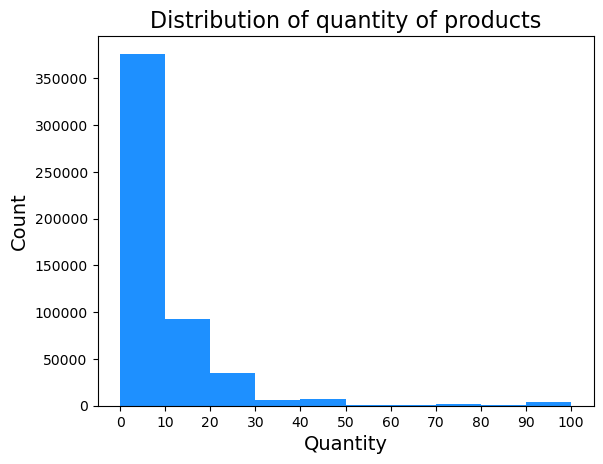

In [25]:
bins = np.arange(0, 110, 10)
ticks = np.arange(0, 110, 10)
plt.hist(data=df, x='Quantity', bins=bins, color='dodgerblue')
plt.xticks(ticks, ticks)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of quantity of products', fontsize=16);

In [26]:
neg_quantity = df[df['Quantity']<0]

In [27]:
neg_quantity.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [28]:
neg_quantity.shape

(10624, 8)

In [29]:
df.dropna(subset=['CustomerID'], inplace=True)

In [30]:
df.shape

(406829, 8)

In [31]:
# Let's check NULL records in the CustomerId column
df['CustomerID'].isnull().sum()

0

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [33]:
df = df.loc[df['Quantity'] > 0]
# Let's check negative records
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [34]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']
# Let's check the time period
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-11-30 17:37:00'))

In [37]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days / x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [42]:
# Let's look at the number of purchases
ax = df_summary.groupby('sales_count').count()['sales_avg'][:20].plot(
        kind='bar', 
        color='dodgerblue', 
        figsize=(10,8), 
        grid=False)
plt.xlabel('Sales count', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Number of purchases made by repeat customers', fontsize=16);

NameError: name 'df_summary' is not defined

In [43]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test, test_preds, color='dodgerblue')
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Test Set', fontsize=16)
plt.grid()

NameError: name 'y_test' is not defined

<Figure size 640x480 with 0 Axes>